# Demo: Using `plot_geo` package

### Step 1) Import the package

In [1]:
import plot_geo as geo

### Step 2) Use the function `load_data()` to create a dataframe
Specify the Excel file name and sheet name to be loaded into a dataframe.

In [6]:
file = '3D_Battery_Parameter_Log.xls'
sheet = 'GeometryParameters'
df = geo.load_data(file, sheet)

#### View the dataframe

In [4]:
df.head()

,Paper,Set,Full Cell Thickness [µm],Cathode Thickness [µm],Anode Thickness [µm],Separator Thickness [µm],Cathode Length [µm],Anode Length [µm],Overall Architecture,Cathode Architecture,Anode Architecture
0,1,1,NaN,500.0,NaN,NaN,100.0,NaN,2.5D,Solid Column,1D
1,2,1,NaN,NaN,215.0,NaN,NaN,NaN,2.5D,1D,Coated Lattice
2,2,2,NaN,NaN,415.0,NaN,NaN,NaN,2.5D,1D,Coated Lattice
3,2,3,NaN,NaN,265.0,NaN,NaN,NaN,2.5D,1D,Coated Lattice
4,2,4,NaN,NaN,473.0,NaN,NaN,NaN,2.5D,1D,Coated Lattice


### Step 3) Use the function `get_archs()` to create lists of the architecture types and architectures
Specify the dataframe created above, `df`.

In [14]:
archs, arch_strings = geo.get_archs(df)

#### View the two lists

In [15]:
print('Architecture types:')
print(arch_strings)
print()
print('Architectures:')
print(archs)

Architecture types:
['Overall Architecture', 'Cathode Architecture', 'Anode Architecture']

Architectures:
[['2.5D', 'Interdigitated'], ['1D', 'Coated Column', 'Coated Network', 'Electrolyte channel', 'Int plate', 'Nanotube', 'Solid Column'], ['1D', 'Coated Column', 'Coated Lattice', 'Electrolyte channel', 'Int plate', 'Solid Column']]


#### View the architectures for each architecture type (overall, cathode, and anode)

In [40]:
for i in range(len(archs)):
    print('Architecture type:', arch_strings[i])
    print('Architectures:', archs[i])
    print()

Architecture type: Overall Architecture
Architectures: ['2.5D', 'Interdigitated']

Architecture type: Cathode Architecture
Architectures: ['1D', 'Coated Column', 'Coated Network', 'Electrolyte channel', 'Int plate', 'Nanotube', 'Solid Column']

Architecture type: Anode Architecture
Architectures: ['1D', 'Coated Column', 'Coated Lattice', 'Electrolyte channel', 'Int plate', 'Solid Column']



### Step 4) Use the function `get_params()` to create lists of the geoemtry parameter values and errors for a given architecture type.
Specify the dataframe and an architecture type. In this case, we use `df` and `arch_type=Overall Architecture`. There are six geometry parameters.

In [47]:
params, errors = geo.get_params(df, arch_type='Overall Architecture')

#### View the two lists

In [48]:
print('Parameter values:')
print(params)
print()
print('Parameter errors:')
print(errors)

Parameter values:
[[1.2833333333333334, 100.06400000000001], [171.89705882352942, 110.73368421052629], [164.10000000000002, 121.69099999999999], [10.048214285714286, 46.005], [227.01250000000002, 12.24465], [102.66666666666667, 24.419047619047618]]

Parameter errors:
[array([[  0.88333333,  99.904     ],
       [  4.41666667, 379.936     ]]), array([[171.79705882, 110.66368421],
       [378.10294118, 949.26631579]]), array([[164.   , 121.681],
       [655.9  , 938.309]]), array([[10.02321429, 45.98      ],
       [39.95178571, 53.995     ]]), array([[ 226.5125 ,   12.22765],
       [2272.9875 ,   37.75535]]), array([[102.46666667,  24.21904762],
       [397.33333333,  25.58095238]])]


#### View the values and errors for each geometry parameter

In [50]:
param_strings = ['Average Full Cell Thickness', 'Average Cathode Thickness', 'Average Anode Thickness', 
                     'Average Separator Thickness', 'Average Cathode Length', 'Average Anode Length']
for i in range(len(params)):
    print('Parameter:', param_strings[i])
    print('Values:', params[i])
    print('Errors:', errors[i])
    print()

Parameter: Average Full Cell Thickness
Values: [1.2833333333333334, 100.06400000000001]
Errors: [[  0.88333333  99.904     ]
 [  4.41666667 379.936     ]]

Parameter: Average Cathode Thickness
Values: [171.89705882352942, 110.73368421052629]
Errors: [[171.79705882 110.66368421]
 [378.10294118 949.26631579]]

Parameter: Average Anode Thickness
Values: [164.10000000000002, 121.69099999999999]
Errors: [[164.    121.681]
 [655.9   938.309]]

Parameter: Average Separator Thickness
Values: [10.048214285714286, 46.005]
Errors: [[10.02321429 45.98      ]
 [39.95178571 53.995     ]]

Parameter: Average Cathode Length
Values: [227.01250000000002, 12.24465]
Errors: [[ 226.5125    12.22765]
 [2272.9875    37.75535]]

Parameter: Average Anode Length
Values: [102.66666666666667, 24.419047619047618]
Errors: [[102.46666667  24.21904762]
 [397.33333333  25.58095238]]



### Step 5) Use the function `plot_geo_params()` to create plots of the input parameter vs. all other parameters for a given architecture type.
Specify the dataframe, an architecture type, a parameter, and a boolean indicating if the plots should be saved to a PDF file. In this case, we use `df`, `arch_type=Anode Architecture`, `param=Average Anode Length`, and `save_plot=False`. There are six geometry parameters, so five plots are produced.

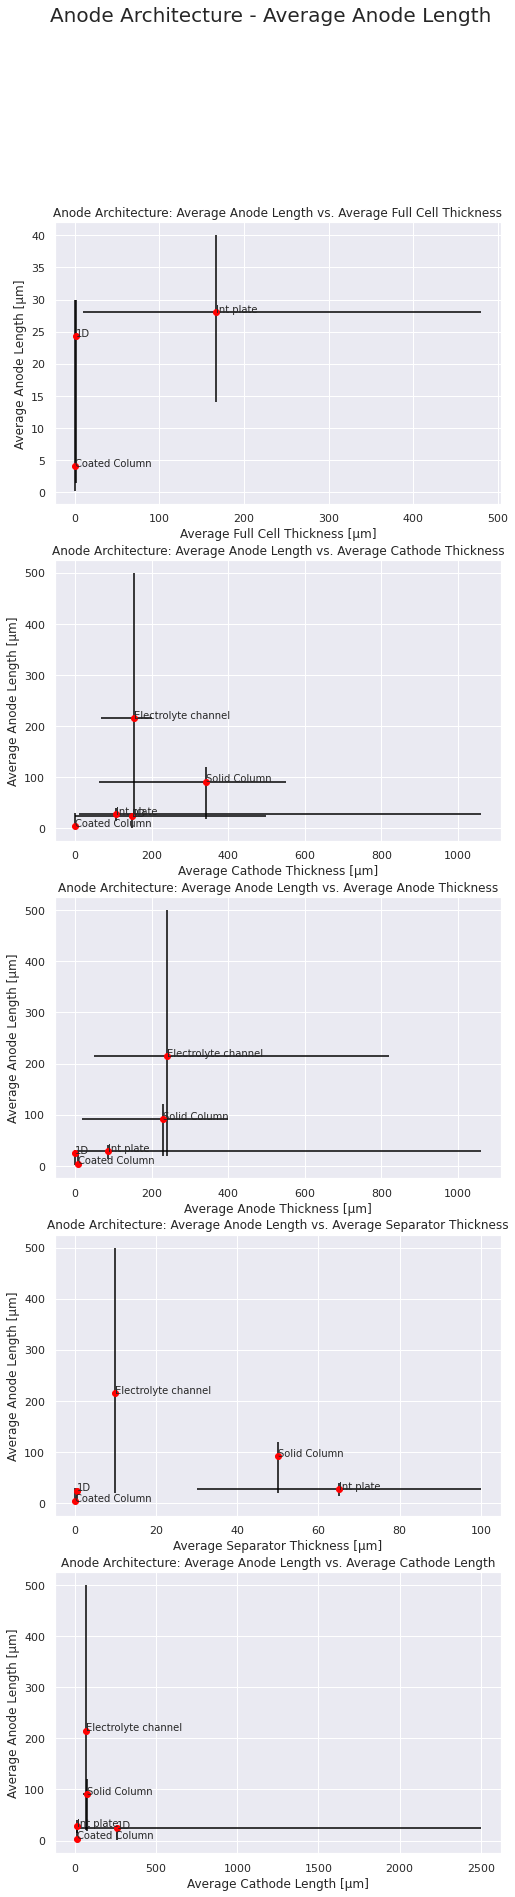

In [51]:
geo.plot_geo_params(df, arch_type='Anode Architecture', param='Average Anode Length', save_plot=False)

### Step 6) Use the function `interactive_plot_geo_params()` to create interactive plots of the geometry parameters for each architecture type, labeled by architecture
Specify the dataframe and a boolean indicating if the plots should be saved to PDF files. In this case, we use `df` and `save_plot=False`.

In [53]:
geo.interactive_plot_geo_params(df, save_fig=False)

interactive(children=(Dropdown(description='Architecture type', options=('Overall Architecture', 'Cathode Arch…

<function plot_geo.plot_geo_params(merged_df, arch_type, param, save_plot)>